In [4]:
#Importar librerias 
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings("ignore")
!pip install yfinance 
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


1. Descargue las series de tiempo de precios (ajustados) mensuales para el periodo Ene 2010 a Dic-2021 de las siguientes 4 acciones: MCD, GE, IBM, T. Con esta información:  


In [6]:
# Precios históricos para los activos seleccionados
activos = ["MCD", "GE","IBM", "T"]
precios = yf.download(activos,start="2010-01-01",end="2021-12-31")
precios = precios.loc[:,"Adj Close"]
precios#.plot()

[*********************100%***********************]  4 of 4 completed


,GE,IBM,MCD,T
Date,,,,
2010-01-04,87.554321,82.284225,43.956013,8.221733
2010-01-05,88.007675,81.290260,43.619938,8.181458
2010-01-06,87.554321,80.762199,43.024803,8.101089
2010-01-07,92.087852,80.482597,43.339874,8.010129
2010-01-08,94.071327,81.290260,43.297863,7.951447
...,...,...,...,...
2021-12-23,93.803635,125.941460,263.021027,17.791782
2021-12-27,94.422340,126.895920,265.285767,17.727392
2021-12-28,95.100922,127.869675,264.929749,17.756008


a. Calcule los retornos logarítmicos. 

In [7]:
retornos=np.log(precios/precios.shift()).dropna()
retornos

,GE,IBM,MCD,T
Date,,,,
2010-01-05,0.005165,-0.012153,-0.007675,-0.004911
2010-01-06,-0.005165,-0.006517,-0.013738,-0.009872
2010-01-07,0.050484,-0.003468,0.007296,-0.011292
2010-01-08,0.021310,0.009985,-0.000970,-0.007353
2010-01-11,0.009592,-0.010526,0.007732,-0.004808
...,...,...,...,...
2021-12-23,0.009943,0.006759,0.003805,0.003626
2021-12-27,0.006574,0.007550,0.008574,-0.003626
2021-12-28,0.007161,0.007644,-0.001343,0.001613


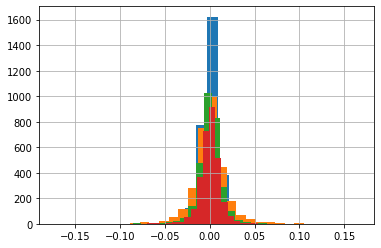

In [13]:
retornos["MCD"].hist(bins=28)
retornos["GE"].hist(bins=28)
retornos["IBM"].hist(bins=28)
retornos["T"].hist(bins=28)

In [14]:
# Info de las series
retornos.describe()

,GE,IBM,MCD,T
count,3019.000000,3019.000000,3019.000000,3019.000000
mean,0.000025,0.000149,0.000594,0.000254
std,0.019953,0.014189,0.011884,0.012152
min,-0.164394,-0.137548,-0.172870,-0.096963
25%,-0.008449,-0.006146,-0.004603,-0.005546
50%,0.000000,0.000401,0.000832,0.000788
75%,0.008441,0.006952,0.005989,0.006442
max,0.137411,0.107068,0.166577,0.095513


b. Calcule las estadísticas descriptivas (media, mediana, desv. estándar, curtosis, simetría) para cada uno de ellos. Presente los estadísticos en una tabla para todos los activos.

### Media

In [17]:

mean,sigma=retornos['GE'].mean(),retornos['GE'].std()
mean,sigma
mean*252,sigma*np.sqrt(252)

(0.0063741448093599246, 0.3167450385392402)

In [19]:
mean,sigma=retornos['IBM'].mean(),retornos['IBM'].std()
mean,sigma
mean*252,sigma*np.sqrt(252)

(0.0375985640868494, 0.22523565242006074)

In [20]:
mean,sigma=retornos['MCD'].mean(),retornos['MCD'].std()
mean,sigma
mean*252,sigma*np.sqrt(252)

(0.14972848260676647, 0.18865913561922082)

In [21]:
mean,sigma=retornos['T'].mean(),retornos['T'].std()
mean,sigma
mean*252,sigma*np.sqrt(252)

(0.06413354087420498, 0.19290807479288619)

### MEDIANA

In [49]:
median,sigma=retornos['GE'].median(),retornos['GE'].std()
median,sigma
median*252,sigma*np.sqrt(252)

(0.0, 0.3167450385392402)

In [23]:
median,sigma=retornos['IBM'].median(),retornos['IBM'].std()
median,sigma
median*252,sigma*np.sqrt(252)

(0.10097211434050271, 0.22523565242006074)

In [24]:
median,sigma=retornos['MCD'].median(),retornos['MCD'].std()
median,sigma
median*252,sigma*np.sqrt(252)

(0.20976853649727858, 0.18865913561922082)

In [25]:
median,sigma=retornos['T'].median(),retornos['T'].std()
median,sigma
median*252,sigma*np.sqrt(252)

(0.19865079673890873, 0.19290807479288619)

### DESV. ESTANDAR 

In [31]:
std,sigma=retornos['GE'].std(),retornos['GE'].std()
std,sigma
std*252,sigma*np.sqrt(252)

(5.028171605930393, 0.3167450385392402)

In [32]:
std,sigma=retornos['IBM'].std(),retornos['IBM'].std()
std,sigma
std*252,sigma*np.sqrt(252)

(3.5755051361331844, 0.22523565242006074)

In [33]:
std,sigma=retornos['MCD'].std(),retornos['MCD'].std()
std,sigma
std*252,sigma*np.sqrt(252)

(2.9948709324531952, 0.18865913561922082)

In [38]:
std,sigma=retornos['T'].std(),retornos['T'].std()
std,sigma
std*252,sigma*np.sqrt(252)

(3.062320750789348, 0.19290807479288619)

### Curtosis

In [40]:
kurt,sigma=retornos['GE'].kurt(),retornos['GE'].std()
kurt,sigma
kurt*252,sigma*np.sqrt(252)

(2015.1430290332576, 0.3167450385392402)

In [42]:
kurt,sigma=retornos['IBM'].kurt(),retornos['IBM'].std()
kurt,sigma
kurt*252,sigma*np.sqrt(252)

(2775.2543896157663, 0.22523565242006074)

In [44]:
kurt,sigma=retornos['MCD'].kurt(),retornos['MCD'].std()
kurt,sigma
kurt*252,sigma*np.sqrt(252)

(8859.137426117273, 0.18865913561922082)

In [45]:
kurt,sigma=retornos['T'].kurt(),retornos['T'].std()
kurt,sigma
kurt*252,sigma*np.sqrt(252)

(2207.2021827524964, 0.19290807479288619)

### Histograma del los activos: GE - IBM

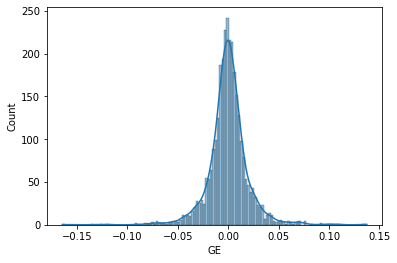

In [63]:
sbn.histplot(data=retornos, x="GE", kde=True)

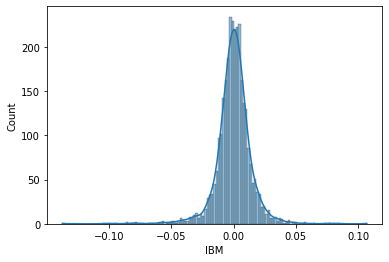

In [64]:
sbn.histplot(data=retornos, x="IBM", kde=True)

### Parkinson

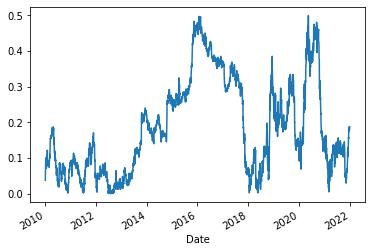

In [68]:
lnHL = np.log(precios["GE"]/precios["IBM"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_d.plot()

### Garman-Klass

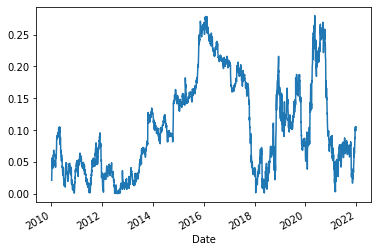

In [70]:
lnHL = np.log(precios["GE"]/precios["IBM"]).dropna()
lnCO = np.log(precios["GE"]/precios["IBM"]).dropna()
sigmaGK_d = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK_d.plot()

### volatilidad ponderada  exponencial (EWMA) con una lambda de 0.94.

In [106]:
# Definir la función
def EWMAvol(retornos,Lambda):
  m = len(retornos) 
  b = np.arange(m-1,-1,-1) # secuencia decreciente
  l = np.repeat(Lambda,m)

  varewma = ((np.power(retornos,2)*(np.power("GE","IBM"))).sum())*(1-Lambda)
  EWMAvol = np.sqrt(varewma)
  return(EWMAvol)

In [104]:
Lambda = 0.94


In [ ]:
Lambda = 0.94
sigmaewma = EWMAvol(retornos,Lambda)*np.sqrt(252)
sigmaewma

In [ ]:
 varewma = ((np.power(retornos,2)*(np.power(l,b))))*(1-0.94)
 varewma.plot()